# Assignment 3 - Youssef Gamal Hassan

##Imports

In [232]:
import numpy as np
import pandas as pd

import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.decomposition import PCA

##Loading Data

In [233]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [234]:
data.drop(('id'), axis = 1, inplace = True)
data.drop(('Unnamed: 32'), axis = 1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##Preprocessing Data

In [235]:
encoder = LabelEncoder()
data['diagnosis'] = encoder.fit_transform(data['diagnosis'])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [236]:
scaler = MinMaxScaler()
data.iloc[:, 1:] = scaler.fit_transform(data.iloc[:, 1:])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [237]:
y = data['diagnosis']
X = data.drop(('diagnosis'), axis = 1)


##Splitting

In [238]:
X_train, X_remain, y_train, y_remain = train_test_split(X, y, train_size = 0.6, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, train_size = 0.5, random_state = 42)

##SVM

###Analyzing Different Kernels and Parameters

In [239]:
kernels = ['linear', 'poly', 'rbf']

Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

gammas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

degrees = [1, 2, 3, 4, 5]

results = []

for kernel in kernels:
  for C in Cs:
    for gamma in gammas:
      for degree in degrees:

        if kernel != 'poly' and degree != 1:
                    continue
        if kernel == 'linear' and gamma != 0.0001:
            continue

        svm = SVC(kernel = kernel, C = C, gamma = gamma, degree = degree)
        svm.fit(X_train, y_train)

        y_val_pred = svm.predict(X_val)

        mse = mean_squared_error(y_val, y_val_pred)
        accuracy = accuracy_score(y_val, y_val_pred)

        results.append({
                    'Kernel': kernel,
                    'C': C,
                    'Gamma': gamma,
                    'Degree': degree if kernel == 'poly' else None,
                    'MSE': mse,
                    'Accuracy': accuracy
                })


results_df = pd.DataFrame(results)

print(results_df)

     Kernel          C     Gamma  Degree       MSE  Accuracy
0    linear     0.0001    0.0001     NaN  0.368421  0.631579
1    linear     0.0010    0.0001     NaN  0.368421  0.631579
2    linear     0.0100    0.0001     NaN  0.175439  0.824561
3    linear     0.1000    0.0001     NaN  0.026316  0.973684
4    linear     1.0000    0.0001     NaN  0.017544  0.982456
..      ...        ...       ...     ...       ...       ...
339     rbf  1000.0000    0.0100     NaN  0.008772  0.991228
340     rbf  1000.0000    0.1000     NaN  0.017544  0.982456
341     rbf  1000.0000    1.0000     NaN  0.043860  0.956140
342     rbf  1000.0000   10.0000     NaN  0.043860  0.956140
343     rbf  1000.0000  100.0000     NaN  0.368421  0.631579

[344 rows x 6 columns]


###Getting Best Results

In [240]:
best_accuracy_row = results_df.loc[results_df['Accuracy'].idxmax()]

best_mse_row = results_df.loc[results_df['MSE'].idxmin()]

print("Best Result by Accuracy:")
print(best_accuracy_row)

print("\nBest Result by MSE:")
print(best_mse_row)


Best Result by Accuracy:
Kernel        linear
C               10.0
Gamma         0.0001
Degree           NaN
MSE         0.008772
Accuracy    0.991228
Name: 5, dtype: object

Best Result by MSE:
Kernel        linear
C               10.0
Gamma         0.0001
Degree           NaN
MSE         0.008772
Accuracy    0.991228
Name: 5, dtype: object


Through this experimentation, we find that the best parameters are:


* Kernel:        linear
* C:               10.0
* Gamma:         0.0001
* Degree:           NaN
* MSE:         0.008772
* Accuracy:    0.991228

We'll run these parameters on the testing data to check accuracy and MSE

In [241]:
svm = SVC(kernel = 'linear', C = 10, gamma = 0.0001)
svm.fit(X_train, y_train)

y_test_pred = svm.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

print("MSE:", mse)
print("Accuracy:", accuracy)

MSE: 0.02631578947368421
Accuracy: 0.9736842105263158


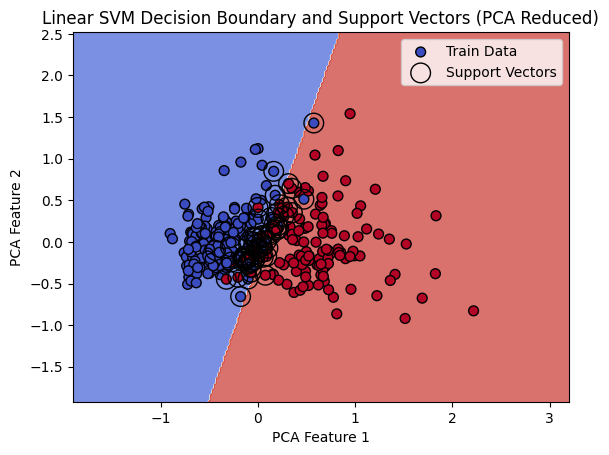

In [242]:
# Plotting the results
# PCA was used here to reduce the features so we can plot them on a 2D graph, this might cause inaccuracy between the non-PCA predictions and PCA predictions.
# However, this was done for the sake of visualization only.

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

svm = SVC(kernel='linear', C=10, gamma=0.0001)
svm.fit(X_train_2d, y_train)

h = 0.02
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')

plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, s=50, edgecolors='k', cmap='coolwarm', label="Train Data")

plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='black', label="Support Vectors")

plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Linear SVM Decision Boundary and Support Vectors (PCA Reduced)')
plt.legend()

plt.show()

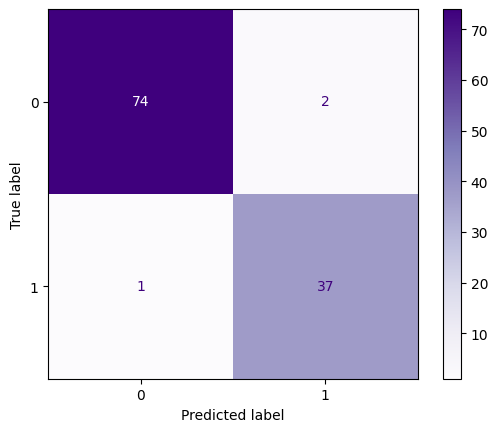

In [243]:
# Making a Confusion Matrix for the final results

svm = SVC(kernel = 'linear', C = 10, gamma = 0.0001)
svm.fit(X_train, y_train)

y_test_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Purples')
plt.show()


We got the following values for MSE and accuracy:

* MSE: 0.02631578947368421
* Accuracy: 0.9736842105263158

###Analyzing Feature Importance

In [244]:
svm = SVC(kernel = 'linear', C = 10, gamma = 0.0001)
svm.fit(X_train, y_train)

coefficients = svm.coef_[0]
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})

importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

print(importance_df)

                    Feature  Coefficient  Absolute Coefficient
28           symmetry_worst     4.229137              4.229137
21            texture_worst     4.108129              4.108129
7       concave points_mean     3.752347              3.752347
10                radius_se     3.518890              3.518890
12             perimeter_se     2.773542              2.773542
6            concavity_mean     2.420842              2.420842
26          concavity_worst     2.368508              2.368508
20             radius_worst     2.354289              2.354289
13                  area_se     2.232899              2.232899
5          compactness_mean    -2.129219              2.129219
22          perimeter_worst     2.078704              2.078704
23               area_worst     1.914024              1.914024
24         smoothness_worst     1.887120              1.887120
18              symmetry_se    -1.800651              1.800651
27     concave points_worst     1.677018              1

Through analyzing the weights of the model, we find that **symmetry_worst** has the greatest contribution to the model's prediction. On the contrary, **symmetry_mean** had the least contribution. Building on this information, we could create a threshold for weight values and remove the features with the least contribution. This might cause issues if done alone. It would be better if the data is preprocessed by checking feature independance and correlation and then remove the highly correlated features.

###Analyzing Training Size

In [245]:
training_sizes = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

results = []

for size in training_sizes:
  X_train, X_remain, y_train, y_remain = train_test_split(X, y, train_size = size, random_state = 42)
  X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, train_size = 0.5, random_state = 42)

  svm = SVC(kernel = 'linear', C = 10, gamma = 0.0001)
  svm.fit(X_train, y_train)

  y_val_pred = svm.predict(X_val)

  mse = mean_squared_error(y_val, y_val_pred)
  accuracy = accuracy_score(y_val, y_val_pred)

  results.append({
      'Training Size': str(int(size * 100)) + "%",
      'MSE': mse,
      'Accuracy': accuracy
  })

results_df = pd.DataFrame(results)

print(results_df)


  Training Size       MSE  Accuracy
0           90%  0.035714  0.964286
1           80%  0.035088  0.964912
2           70%  0.023529  0.976471
3           60%  0.008772  0.991228
4           50%  0.021127  0.978873
5           40%  0.035088  0.964912
6           30%  0.025126  0.974874
7           20%  0.021930  0.978070
8           10%  0.042969  0.957031


The best training size for the model is 60%. It resulted in the following accuracy and mse on the cross-validation set:

* MSE: 0.008772  
* Accuracy: 0.991228

Since this was the split we used in the inital testing of the SVM model, running the code for the testing again is redundant.

##Multinomial Naive-Bayes


###Splitting Data

In [246]:
y = data['diagnosis']
X = data.drop(('diagnosis'), axis = 1)

X_train, X_remain, y_train, y_remain = train_test_split(X, y, train_size = 0.6, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, train_size = 0.5, random_state = 42)

###Implementing Model and Testing Parameters

In [247]:
alpha = [0.1, 0.5, 1.0, 2.0]
fit_prior = [True, False]

results = []

for a in alpha:
  for f in fit_prior:
    nb = MultinomialNB(alpha = a, fit_prior = f)
    nb.fit(X_train, y_train)

    y_val_pred = nb.predict(X_val)

    mse_val = mean_squared_error(y_val, y_val_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)

    results.append({
        'Alpha': a,
        'Fit Prior': f,
        'MSE': mse_val,
        'Accuracy': accuracy_val
    })

results_df = pd.DataFrame(results)

print(results_df)

   Alpha  Fit Prior       MSE  Accuracy
0    0.1       True  0.114035  0.885965
1    0.1      False  0.087719  0.912281
2    0.5       True  0.114035  0.885965
3    0.5      False  0.087719  0.912281
4    1.0       True  0.122807  0.877193
5    1.0      False  0.087719  0.912281
6    2.0       True  0.114035  0.885965
7    2.0      False  0.087719  0.912281


In [248]:
best_accuracy_row = results_df.loc[results_df['Accuracy'].idxmax()]

best_mse_row = results_df.loc[results_df['MSE'].idxmin()]

print("Best Result by Accuracy:")
print(best_accuracy_row)

print("\nBest Result by MSE:")
print(best_mse_row)

Best Result by Accuracy:
Alpha             0.1
Fit Prior       False
MSE          0.087719
Accuracy     0.912281
Name: 1, dtype: object

Best Result by MSE:
Alpha             0.1
Fit Prior       False
MSE          0.087719
Accuracy     0.912281
Name: 1, dtype: object


The best model parameters were tied between:

\begin{array}{|c|c|c|c|}
\hline
\textbf{Alpha} & \textbf{Fit Prior} & \textbf{MSE} & \textbf{Accuracy} \\
\hline
0.1 & \text{False} & 0.087719 & 0.912281 \\
0.5 & \text{False} & 0.087719 & 0.912281 \\
1.0 & \text{False} & 0.087719 & 0.912281 \\
2.0 & \text{False} & 0.087719 & 0.912281 \\
\hline
\end{array}

Since they give the same MSE and Accuracy, using any of these combination should result in the same test MSE and Accuracy. We'll try each one with the test data.

For fit_prior, True gave accuracies that are less than the ones shown in the table. Therefore, fit_prior= False is the best option.


In [249]:
testing_alphas = [0.1, 0.5, 1.0, 2.0]

results = []

for alpha in testing_alphas:
  nb = MultinomialNB(alpha = alpha, fit_prior = False)
  nb.fit(X_train, y_train)

  y_test_pred = nb.predict(X_test)

  mse = mean_squared_error(y_test, y_test_pred)
  accuracy = accuracy_score(y_test, y_test_pred)

  results.append({
      'Alpha': alpha,
      'MSE': mse,
      'Accuracy': accuracy
      })

results_df = pd.DataFrame(results)

print(results_df)

   Alpha       MSE  Accuracy
0    0.1  0.184211  0.815789
1    0.5  0.184211  0.815789
2    1.0  0.175439  0.824561
3    2.0  0.175439  0.824561


Based on the previous code, these were the best parameters on the testing data:

\begin{array}{|c|c|c|c|}
\hline
\textbf{Alpha} & \textbf{Fit Prior} & \textbf{MSE} & \textbf{Accuracy} \\
\hline
1.0 & \text{False} & 0.175439 & 0.824561 \\
2.0 & \text{False} & 0.087719 & 0.824561 \\
\hline
\end{array}

We can then use either 1.0 or 2.0 for our alpha.


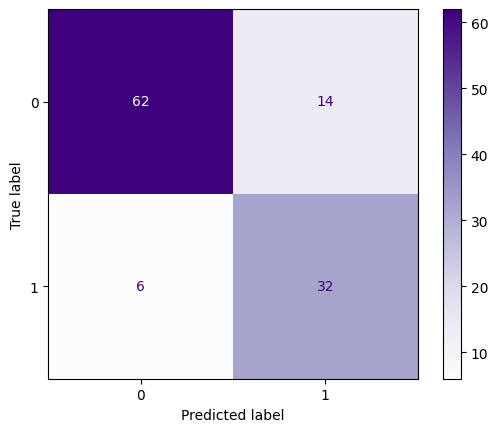

In [250]:
nb = MultinomialNB(alpha = 1.0, fit_prior = False)
nb.fit(X_train, y_train)

y_test_pred = nb.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Purples')
plt.show()

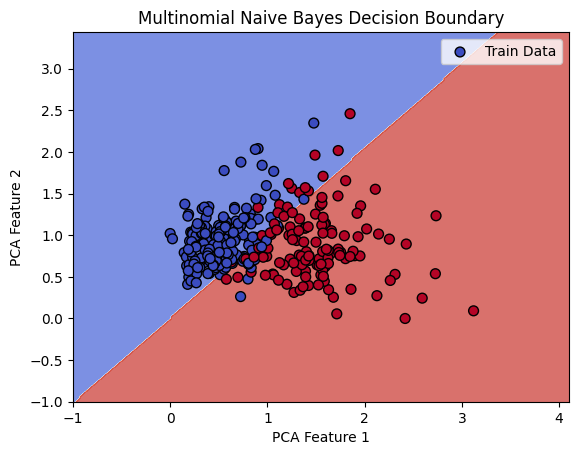

In [251]:
# Plotting Results
# PCA was used here to reduce the features so we can plot them on a 2D graph, this might cause inaccuracy between the non-PCA predictions and PCA predictions.
# However, this was done for the sake of visualization only.


pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

X_train_2d_non_negative = X_train_2d - np.min(X_train_2d, axis=0)

nb = MultinomialNB(alpha = 1.0, fit_prior = False)
nb.fit(X_train_2d_non_negative, y_train)

h = 0.02
x_min, x_max = X_train_2d_non_negative[:, 0].min() - 1, X_train_2d_non_negative[:, 0].max() + 1
y_min, y_max = X_train_2d_non_negative[:, 1].min() - 1, X_train_2d_non_negative[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')

plt.scatter(X_train_2d_non_negative[:, 0], X_train_2d_non_negative[:, 1], c=y_train, s=50, edgecolors='k', cmap='coolwarm', label="Train Data")

plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Multinomial Naive Bayes Decision Boundary')
plt.legend()

plt.show()

##Comparative Analysis

In [252]:
y = data['diagnosis']
X = data.drop(('diagnosis'), axis = 1)

X_train, X_remain, y_train, y_remain = train_test_split(X, y, train_size = 0.6, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, train_size = 0.5, random_state = 42)

###Performance Metrics

First, let's rerun the models and compare their accuracies, MSE, and confusion matrices

SVM:
MSE: 0.02631578947368421
Accuracy: 0.9736842105263158


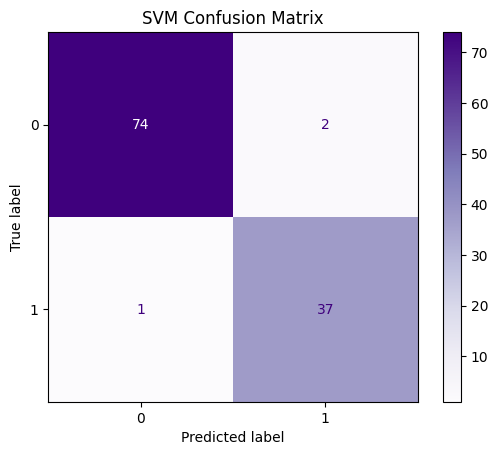


Multinomial Naive-Bayes:
MSE: 0.17543859649122806
Accuracy: 0.8245614035087719


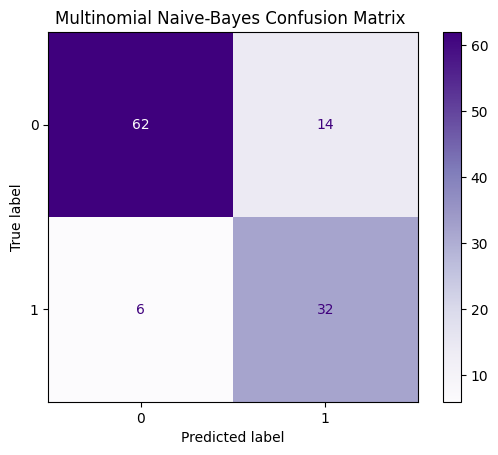

In [253]:
# SVM
svm = SVC(kernel = 'linear', C = 10, gamma = 0.0001)
svm.fit(X_train, y_train)

y_svm_pred = svm.predict(X_test)

mse_svm = mean_squared_error(y_test, y_svm_pred)
accuracy_svm = accuracy_score(y_test, y_svm_pred)

print("SVM:")
print("MSE:", mse_svm)
print("Accuracy:", accuracy_svm)

cm = confusion_matrix(y_test, y_svm_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Purples')
plt.title('SVM Confusion Matrix')
plt.show()


# Multinomial Naive-Bayes
nb = MultinomialNB(alpha = 1.0, fit_prior = False)
nb.fit(X_train, y_train)


y_nb_pred = nb.predict(X_test)

mse_nb = mean_squared_error(y_test, y_nb_pred)
accuracy_nb = accuracy_score(y_test, y_nb_pred)

print("\nMultinomial Naive-Bayes:")
print("MSE:", mse_nb)
print("Accuracy:", accuracy_nb)


cm = confusion_matrix(y_test, y_nb_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Purples')
plt.title('Multinomial Naive-Bayes Confusion Matrix ')
plt.show()



\begin{array}{|c|c|c|}
\hline
\textbf{Model} & \textbf{MSE} & \textbf{Accuracy} \\
\hline
\text{SVM} & 0.0263 & 0.9737 \\
\hline
\text{Multinomial Naive Bayes} & 0.1754 & 0.8246 \\
\hline
\end{array}



---


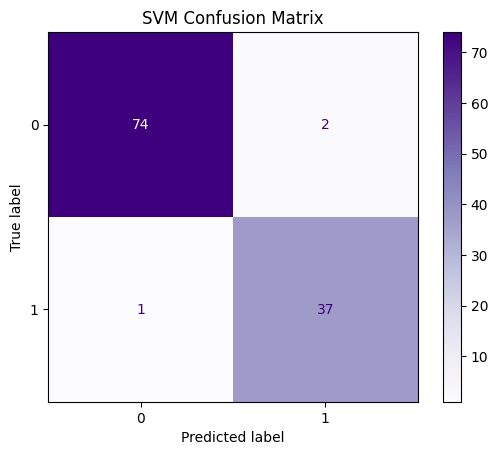

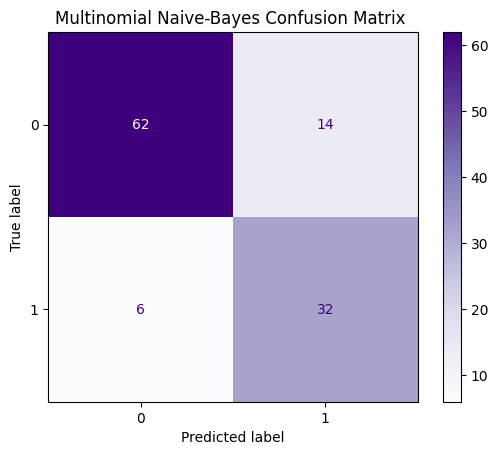

----
From the table and confusion matrices, SVM has better performance.

###Computational Efficiency

####Time Analysis

In [254]:

# Analyzing Training Times

training_times = {'SVM': None, 'Multinomial Naive Bayes': None}

# SVM Training Time

start_time = time.time()

svm = SVC(kernel = 'linear', C = 10, gamma = 0.0001)
svm.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
training_times['SVM'] = training_time

# Multinomial Training Time

start_time = time.time()

nb = MultinomialNB(alpha = 1.0, fit_prior = False)
nb.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
training_times['Multinomial Naive Bayes'] = training_time

print(training_times)


{'SVM': 0.004937410354614258, 'Multinomial Naive Bayes': 0.002788066864013672}


In [255]:
# Analyzing Prediction Times

prediction_times = {'SVM': None, 'Multinomial Naive Bayes': None}

# SVM
start_time = time.time()
svm.predict(X_test)
end_time = time.time()

prediction_time = end_time - start_time
prediction_times['SVM'] = prediction_time

# Multinomial Naive Bayes

start_time = time.time()
nb.predict(X_test)
end_time = time.time()

prediction_time = end_time - start_time
prediction_times['Multinomial Naive Bayes'] = prediction_time

print(prediction_times)


{'SVM': 0.0021979808807373047, 'Multinomial Naive Bayes': 0.0014035701751708984}



\begin{array}{|c|c|c|}
\hline
\textbf{Model} & \textbf{Training Time (seconds)} & \textbf{Testing Time (seconds)} \\
\hline
\text{SVM} & 0.0097 & 0.0033 \\
\hline
\text{Multinomial Naive Bayes} & 0.0031 & 0.0022 \\
\hline
\end{array}

According to this table, Multinomial Naive-Bayes takes less training and prediction times. However, the SVM's accuracy is higher by over 10%. Therefore, SVM is still a better choice.

Do note that rerunning the code will result in different times than shown in the table.

####Memory Usage

In [256]:
pip install memory-profiler


In [257]:
from memory_profiler import memory_usage

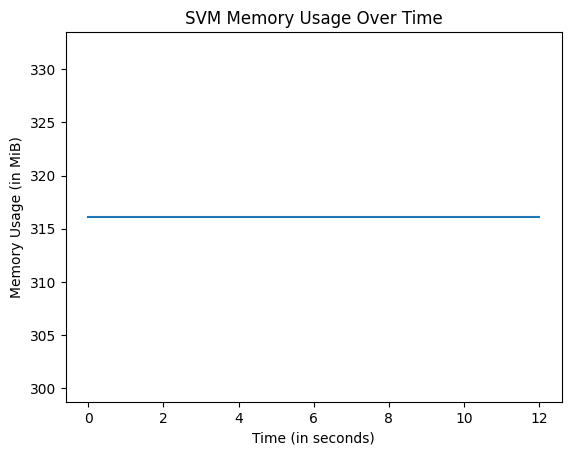

In [258]:
def svm_train_and_predict():
    svm = SVC(kernel = 'linear', C = 10, gamma = 0.0001)
    svm.fit(X_train, y_train)
    predictions = svm.predict(X_test)


mem_usage = memory_usage(svm_train_and_predict)

plt.plot(mem_usage)
plt.title("SVM Memory Usage Over Time")
plt.xlabel("Time (in seconds)")
plt.ylabel("Memory Usage (in MiB)")
plt.show()

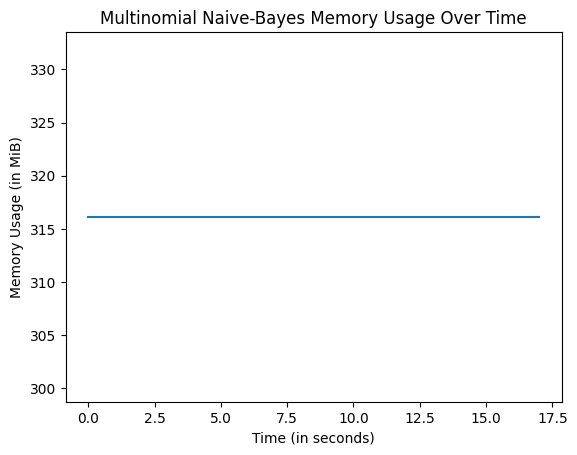

In [259]:
def mnb_train_and_predict():
    nb = MultinomialNB(alpha = 1.0, fit_prior = False)
    nb.fit(X_train, y_train)
    predictions = nb.predict(X_test)


mem_usage = memory_usage(mnb_train_and_predict)

plt.plot(mem_usage)
plt.title("Multinomial Naive-Bayes Memory Usage Over Time")
plt.xlabel("Time (in seconds)")
plt.ylabel("Memory Usage (in MiB)")
plt.show()

For memory usage, both Multinomial Naive-Bayes and SVM resulted in the same usage, as shown in the graphs below. However, I am unsure if the computation of memory usage was executed correctly.


---


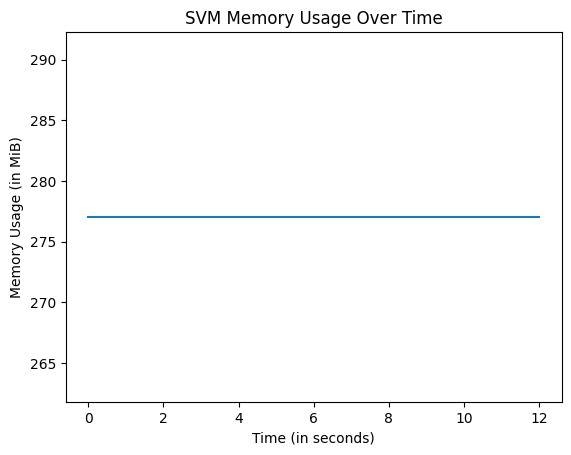
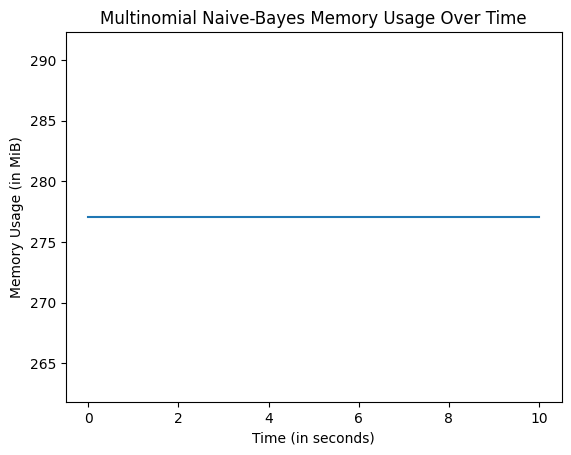

##Summary


Overall, SVM performed best through our different tests and experiments. It resulted in an accuracy of around **97%**. It's Misclassification Rate was around **3%**.

\begin{array}{|c|c|}
\hline
\textbf{Accuracy} & \textbf{Misclassification Rate}\\
\hline
\text{97%} & \text{3%}\\
\hline
\end{array}